# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

iloc[:,1] vs iloc[:,1:-1] 
type of both is Data frame and sequence 
dataframe respectivey, sequence dataframe, returns 2D array in numpy when we apply .values on it 
and sequence returns 1D array in numpy

In [7]:
dataset = pd.read_csv("Position_Salaries.csv")
X= dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values


In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

# Reshaping the "y"

because standard scaler class does not accept the 1D array of y, it will accept the 2D arrays of X and y

In [9]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Trainning the SVR

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Predicting Values

In [15]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

# Visualization

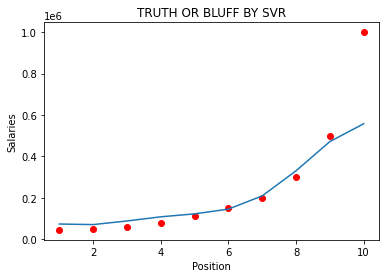

In [16]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title("TRUTH OR BLUFF BY SVR")
plt.xlabel("Position")
plt.ylabel("Salaries")
plt.show()